Some miners say they see brown rocks that at first seemed not differentiate from the asteroid, but they would also be indicators of bauxite.

With the new data collected R2 try to predict the bauxite that an asteroid will have.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import lr_assumptions as lr
import val_curves_helper as vc_helper

In [2]:
df = pd.read_csv('R2.csv')

In [16]:
print(df.describe())

       violet_stone_count  brown_stone_count  bauxite_kg
count          100.000000         100.000000  100.000000
mean            71.910000         296.960000    5.620179
std             42.481153         109.093225    2.173096
min              2.000000         102.000000    2.099950
25%             31.750000         206.750000    3.641069
50%             67.500000         283.000000    5.652337
75%            109.000000         404.250000    7.556816
max            149.000000         499.000000    9.926847


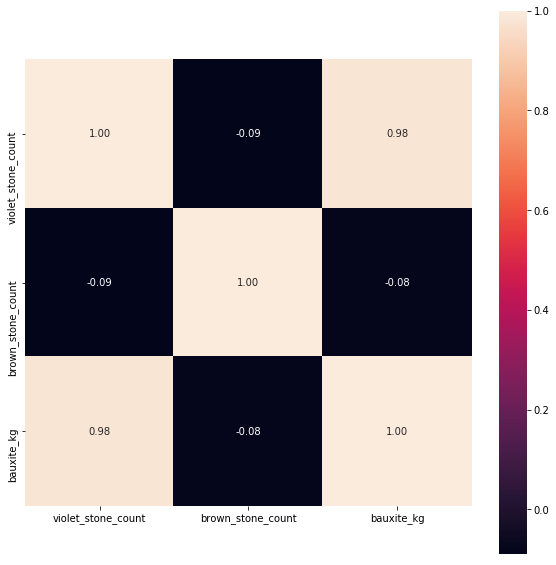

In [4]:
# Correlation matrix as heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()

Strong linear relationship is observed between bauxite and violet_stone_count but as bauxite it will be my target,
then it will not affect us in the training of the model.

## Traning model 

In [5]:
def print_model_statistics(regr, y_test, y_pred):

    # The coefficients
    print('Coefficients: ', regr.coef_)

    # The intercept_ 
    print('Intercept (Y axis when X = 0): ', regr.intercept_)

    # The mean squared error
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

In [10]:
x = df[['violet_stone_count', 'brown_stone_count']]
y = df.bauxite_kg

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [7]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

('Coefficients: ', array([5.01149866e-02, 5.96971370e-05]))
('Intercept (Y axis when X = 0): ', 1.9862965931409873)
Mean squared error: 0.19
Coefficient of determination: 0.96


# Linear Regression Assumptions 

I) Linearity

II) Normality of the Error Terms

III) No Multicollinearity among Predictors

IV) No Autocorrelation of the Error Terms

V) Homoscedasticity

('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
('Checking with a scatter plot of actual vs. predicted.', 'Predictions should follow the diagonal line.')


/anaconda2/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


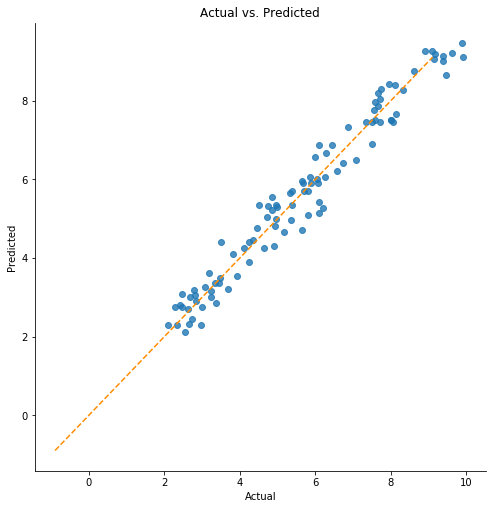

In [8]:
lr.linear_assumption(regr, x, y)

We can see a relatively even spread around the diagonal line.

('Assumption 2: The error terms are normally distributed', '\n')
Using the Anderson-Darling test for normal distribution
('p-value from the test - below 0.05 generally means non-normal:', 0.0685944345696555)
Residuals are normally distributed


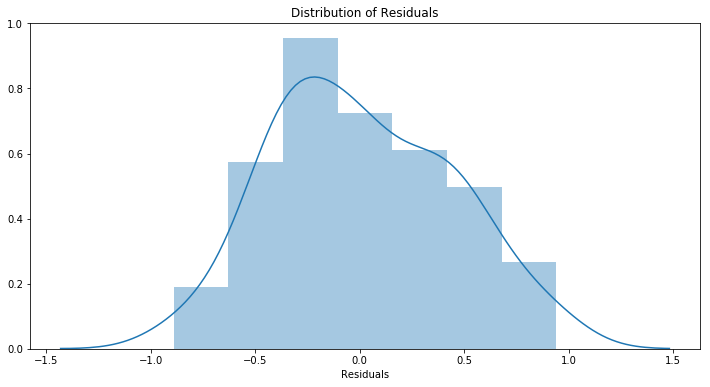

()
Assumption satisfied


In [9]:
lr.normal_errors_assumption(regr, x, y)

Assumption 3: Little to no multicollinearity among predictors


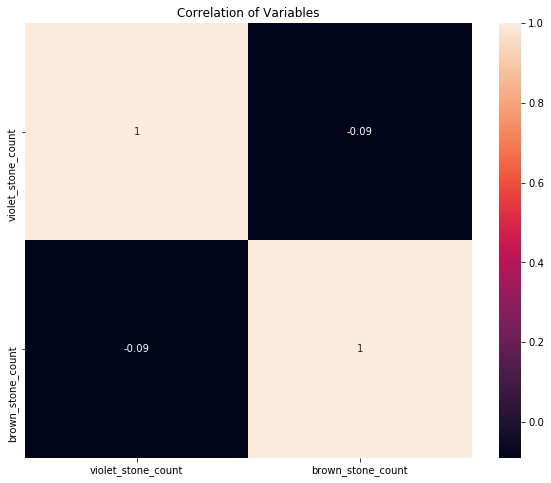

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 2.70633455863
X2: 2.70633455863
()
0 cases of possible multicollinearity
0 cases of definite multicollinearity
()
Assumption satisfied


In [10]:
linear_feature_names = ['X'+str(feature+1) for feature in range(x.shape[1])]
lr.multicollinearity_assumption(regr, x, y, linear_feature_names)

In [11]:
lr.autocorrelation_assumption(regr, x, y)

('Assumption 4: No Autocorrelation', '\n')

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
('Durbin-Watson:', 1.9544028649462213)
('Little to no autocorrelation', '\n')
Assumption satisfied


('Assumption 5: Homoscedasticity of Error Terms', '\n')
Residuals should have relative constant variance


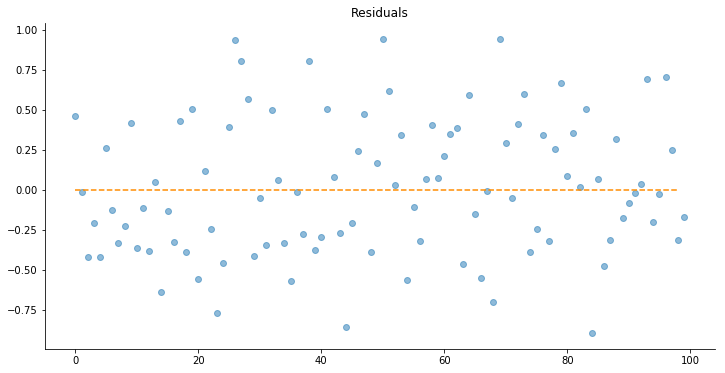

In [12]:
lr.homoscedasticity_assumption(regr, x, y)

We can see a relatively even spread around the diagonal line.

## Performance & sensitivity analysis

In [8]:
client_data = (113, 426)
regr.predict([client_data])

array([7.67472106])

In [11]:
item_to_trial = (113, 426)
vc_helper.predict_trials(x, y, regr, item_to_trial)

Trial 1: 7.72
Trial 2: 7.71
Trial 3: 7.69
Trial 4: 7.71
Trial 5: 7.74
Trial 6: 7.77
Trial 7: 7.71
Trial 8: 7.72
Trial 9: 7.78
Trial 10: 7.73

Range in values: 0.10


- the range observed between Trials is not significant, therefore the uniformity in the distribution of data that we can observe in the linear graph is re-validated

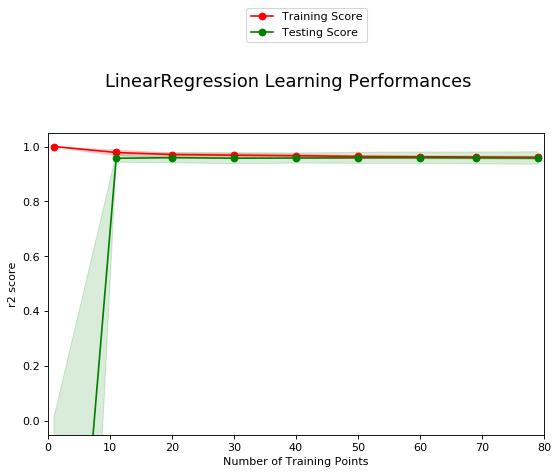

In [11]:
vc_helper.plot_learning_performance(regr, x, y)

- No trace of overfitting or underfitting is observed
- Few points are needed for the model to adjust to the behavior of the dataset